In [19]:
import torch


#索引出来的结果与原数据共享内存，也即修改⼀一个，另⼀一个会跟着修改。
x = torch.rand(4, 6)
print(x)
y = x[1, :]
print(y)
y += 1
print(x, y)

tensor([[0.6722, 0.1139, 0.1937, 0.4719, 0.9403, 0.9175],
        [0.6473, 0.8162, 0.5989, 0.2078, 0.9505, 0.8079],
        [0.2888, 0.9151, 0.9607, 0.1311, 0.8951, 0.2700],
        [0.3894, 0.4684, 0.5706, 0.8966, 0.4229, 0.8328]])
tensor([0.6473, 0.8162, 0.5989, 0.2078, 0.9505, 0.8079])
tensor([[0.6722, 0.1139, 0.1937, 0.4719, 0.9403, 0.9175],
        [1.6473, 1.8162, 1.5989, 1.2078, 1.9505, 1.8079],
        [0.2888, 0.9151, 0.9607, 0.1311, 0.8951, 0.2700],
        [0.3894, 0.4684, 0.5706, 0.8966, 0.4229, 0.8328]]) tensor([1.6473, 1.8162, 1.5989, 1.2078, 1.9505, 1.8079])


In [25]:
#view() 返回的新tensor与源tensor共享内存
z = x.view(24)
m = x.view(-1, 3)# -1所指的维度可以根据其他维度的值推出来
print(z, m)

tensor([0.6722, 0.1139, 0.1937, 0.4719, 0.9403, 0.9175, 1.6473, 1.8162, 1.5989,
        1.2078, 1.9505, 1.8079, 0.2888, 0.9151, 0.9607, 0.1311, 0.8951, 0.2700,
        0.3894, 0.4684, 0.5706, 0.8966, 0.4229, 0.8328]) tensor([[0.6722, 0.1139, 0.1937],
        [0.4719, 0.9403, 0.9175],
        [1.6473, 1.8162, 1.5989],
        [1.2078, 1.9505, 1.8079],
        [0.2888, 0.9151, 0.9607],
        [0.1311, 0.8951, 0.2700],
        [0.3894, 0.4684, 0.5706],
        [0.8966, 0.4229, 0.8328]])


In [29]:
x_cp = x.clone().view(24)
x -= 1
print(x)
print(x_cp)

#使⽤用 clone 还有⼀一个好处是会被记录在计算图中，即梯度回传到副本时也会传到源 Tensor

tensor([[-1.3278, -1.8861, -1.8063, -1.5281, -1.0597, -1.0825],
        [-0.3527, -0.1838, -0.4011, -0.7922, -0.0495, -0.1921],
        [-1.7112, -1.0849, -1.0393, -1.8689, -1.1049, -1.7300],
        [-1.6106, -1.5316, -1.4294, -1.1034, -1.5771, -1.1672]])
tensor([-0.3278, -0.8861, -0.8063, -0.5281, -0.0597, -0.0825,  0.6473,  0.8162,
         0.5989,  0.2078,  0.9505,  0.8079, -0.7112, -0.0849, -0.0393, -0.8689,
        -0.1049, -0.7300, -0.6106, -0.5316, -0.4294, -0.1034, -0.5771, -0.1672])


In [99]:
x = torch.rand(1)#均匀分布
y = torch.randn(1)#标准正态
print(x, y, x.item(), y.item())

tensor([0.8748]) tensor([1.2021]) 0.8748157620429993 1.2020756006240845


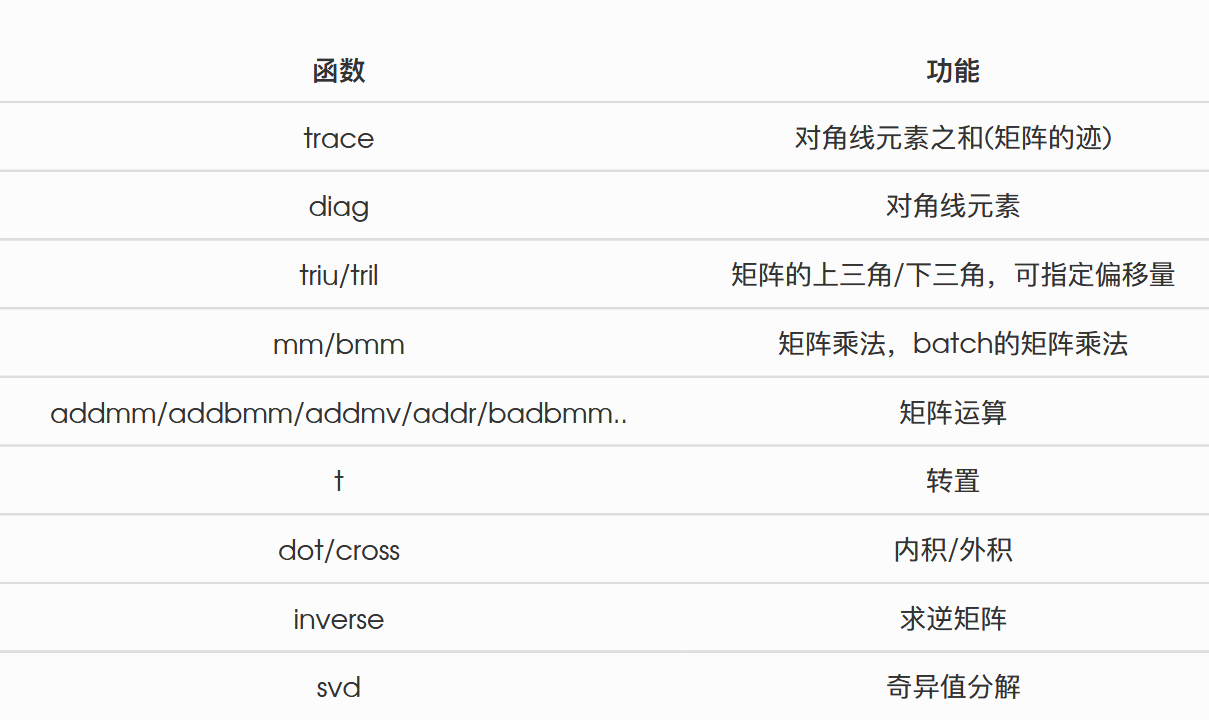

In [108]:
a = torch.ones(5)
b = a.numpy()
print(a, b)

#共享内存
a += 1
print(a, b)
b += 1
print(a, b)

tensor([1., 1., 1., 1., 1.]) [1. 1. 1. 1. 1.]
tensor([2., 2., 2., 2., 2.]) [2. 2. 2. 2. 2.]
tensor([3., 3., 3., 3., 3.]) [3. 3. 3. 3. 3.]


In [128]:
import numpy as np

c = np.ones(5) 
print(c)
d = torch.tensor(c)
print(d)
e = torch.from_numpy(c)
print(e)

#不共享内存
d += 1
print(c, d)

#共享内存
e += 1
print(c, e)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[1. 1. 1. 1. 1.] tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
[2. 2. 2. 2. 2.] tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
